# Start

In [ ]:
!pip install q keras==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount("/content/drive")

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

import os
import requests

import shutil
import random
from math import floor
from PIL import Image
import cv2

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.models import Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

import matplotlib.pyplot as plt

In [ ]:
!unzip "/content/drive/My Drive/FacPedro/training.zip" -d "/content"
!unzip "/content/drive/My Drive/FacPedro/validation.zip" -d "/content"
!unzip "/content/drive/My Drive/FacPedro/testing.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis26.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis27.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis28.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis29.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis30.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis31.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis32.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis33.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis34.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis35.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis36.jpg  
  inflating: /content/training/tuberous sclerosis/tuberous_sclerosis37.jpg  
  inflating: /content/tra

In [ ]:
train_dir = '/content/training/'
val_dir = '/content/validation/'
test_dir = '/content/testing/'

# MobileNetV2

In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator (rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=64,
                                                    class_mode= 'categorical')

validation_generator = test_datagen.flow_from_directory (val_dir,
                                                        target_size=(224,224),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.


In [ ]:
test2_datagen = ImageDataGenerator (rescale=1./255)

test_generator = test2_datagen.flow_from_directory (test_dir,
                                                        target_size=(224,224),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

Found 1751 images belonging to 114 classes.


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.mobilenet_v2.preprocess_input,
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.mobilenet_v2.preprocess_input,
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.mobilenet_v2.preprocess_input,
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.
Found 1751 images belonging to 114 classes.


In [ ]:
IMG_SHAPE = (224, 224, 3)

base_model = applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers[:-2]:
    layer.trainable = False

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout_1 = layers.Dropout(0.5)
dense_layer_2 = layers.Dense(256, activation='relu')
dropout_2 = layers.Dropout(0.5)
dense_layer_3 = layers.Dense(128, activation='relu')
dropout_3 = layers.Dropout(0.5)
prediction_layer = layers.Dense(114, activation='softmax')

model2 = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout_1,
    dense_layer_2,
    dropout_2,
    prediction_layer
])

base_learning_rate = 0.0001

model2.compile(optimizer=optimizers.RMSprop(learning_rate=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score_weighted"),
                       F1Score(average='micro', name = "f1_score_micro"), F1Score(average='macro', name = "f1_score_macro")])

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

In [ ]:
history = model2.fit(
    train_generator, epochs = 30,
    validation_data = validation_generator,
    batch_size = 32,
    verbose=1,
    callbacks=[es],
    shuffle = True)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 107s 434ms/step - accuracy: 0.0155 - f1_score_macro: 0.0081 - f1_score_micro: 0.0155 - f1_score_weighted: 0.0136 - loss: 5.0772 - val_accuracy: 0.0818 - val_f1_score_macro: 0.0171 - val_f1_score_micro: 0.0818 - val_f1_score_weighted: 0.0377 - val_loss: 4.5124
Epoch 2/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 304ms/step - accuracy: 0.0537 - f1_score_macro: 0.0177 - f1_score_micro: 0.0537 - f1_score_weighted: 0.0358 - loss: 4.5205 - val_accuracy: 0.1090 - val_f1_score_macro: 0.0312 - val_f1_score_micro: 0.1090 - val_f1_score_weighted: 0.0589 - val_loss: 4.2560
Epoch 3/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 301ms/step - accuracy: 0.0936 - f1_score_macro: 0.0283 - f1_score_micro: 0.0936 - f1_score_weighted: 0.0605 - loss: 4.2804 - val_accuracy: 0.1280 - val_f1_score_macro: 0.0437 - val_f1_score_micro: 0.1280 - val_f1_score_weighted: 0.0836 - val_loss: 4.1654
Epoch 4/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 60s 300ms/step - accuracy: 0.1117 - f1_score_macro: 0.0385 - f1_score_mic

In [ ]:
predictions = model2.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 501ms/step


In [ ]:
true_classes = test_generator.classes

In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Weighted F1 Score : ", f1)

Weighted F1 Score :  0.26455483433084914


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='micro')
print("Micro F1 Score : ", f1)

Micro F1 Score :  0.2964020559680183


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='macro')
print("Macro F1 Score : ", f1)

Macro F1 Score :  0.21632562840545547


In [ ]:
final_val_loss = history.history['val_loss'][-1]
print("Final validation loss:", final_val_loss)

Final validation loss: 3.274782419204712


In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

                                                       precision    recall  f1-score   support

                                 acanthosis nigricans       0.14      0.10      0.12        10
                                                 acne       0.29      0.21      0.24        19
                                        acne vulgaris       0.50      0.53      0.51        34
acquired autoimmune bullous diseaseherpes gestationis       0.00      0.00      0.00         7
                         acrodermatitis enteropathica       0.00      0.00      0.00        10
                                    actinic keratosis       0.15      0.28      0.19        18
                          allergic contact dermatitis       0.18      0.30      0.23        44
                                        aplasia cutis       0.00      0.00      0.00         8
                                 basal cell carcinoma       0.36      0.45      0.40        47
                     basal cell carcinoma morphei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ResNet50V2

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.resnet_v2.preprocess_input,
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.resnet_v2.preprocess_input,
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.resnet_v2.preprocess_input,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.
Found 1751 images belonging to 114 classes.


In [ ]:
IMG_SHAPE = (224, 224, 3)

base_model = applications.ResNet50V2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers[:-2]:
    layer.trainable = False

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(1024, activation='relu')
dropout_1 = layers.Dropout(0.5)
dense_layer_2 = layers.Dense(512, activation='relu')
dropout_2 = layers.Dropout(0.5)
dense_layer_3 = layers.Dense(256, activation='relu')
dropout_3 = layers.Dropout(0.5)
dense_layer_4 = layers.Dense(128, activation='relu')
dropout_4 = layers.Dropout(0.5)
prediction_layer = layers.Dense(114, activation='softmax')

model3 = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout_1,
    dense_layer_2,
    dropout_2,
    dense_layer_3,
    dropout_3,
    dense_layer_4,
    dropout_4,
    prediction_layer
])

base_learning_rate = 0.00001
model3.compile(optimizer=optimizers.Adagrad(learning_rate=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score_weighted"),
                       F1Score(average='micro', name = "f1_score_micro"), F1Score(average='macro', name = "f1_score_macro")])

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

In [ ]:
history = model3.fit(
    train_generator, epochs = 30,
    validation_data = validation_generator,
    batch_size = 32,
    callbacks=[es],
    shuffle = True,
    verbose=1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


386/386 ━━━━━━━━━━━━━━━━━━━━ 108s 212ms/step - accuracy: 0.0086 - f1_score_macro: 0.0045 - f1_score_micro: 0.0086 - f1_score_weighted: 0.0081 - loss: 7.5898 - val_accuracy: 0.0070 - val_f1_score_macro: 0.0029 - val_f1_score_micro: 0.0070 - val_f1_score_weighted: 0.0022 - val_loss: 4.8153
Epoch 2/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 58s 149ms/step - accuracy: 0.0089 - f1_score_macro: 0.0060 - f1_score_micro: 0.0089 - f1_score_weighted: 0.0070 - loss: 6.7487 - val_accuracy: 0.0066 - val_f1_score_macro: 0.0028 - val_f1_score_micro: 0.0066 - val_f1_score_weighted: 0.0025 - val_loss: 4.7774
Epoch 3/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 58s 149ms/step - accuracy: 0.0091 - f1_score_macro: 0.0055 - f1_score_micro: 0.0091 - f1_score_weighted: 0.0082 - loss: 6.3862 - val_accuracy: 0.0058 - val_f1_score_macro: 0.0031 - val_f1_score_micro: 0.0058 - val_f1_score_weighted: 0.0026 - val_loss: 4.7597
Epoch 4/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 58s 149ms/step - accuracy: 0.0090 - f1_score_macro: 0.0066 - f1_score_mic

In [ ]:
predictions = model3.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step


In [ ]:
true_classes = test_generator.classes

In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Weighted F1 Score : ", f1)

Weighted F1 Score :  0.006953085702355244


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='micro')
print("Micro F1 Score : ", f1)

Micro F1 Score :  0.011422044545973729


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='macro')
print("Macro F1 Score : ", f1)

Macro F1 Score :  0.007012206094160631


In [ ]:
final_val_loss = history.history['val_loss'][-1]
print("Final validation loss:", final_val_loss)

Final validation loss: 4.717559337615967


In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

                                                       precision    recall  f1-score   support

                                 acanthosis nigricans       0.00      0.00      0.00        10
                                                 acne       0.00      0.00      0.00        19
                                        acne vulgaris       0.00      0.00      0.00        34
acquired autoimmune bullous diseaseherpes gestationis       0.00      0.00      0.00         7
                         acrodermatitis enteropathica       0.00      0.00      0.00        10
                                    actinic keratosis       0.00      0.00      0.00        18
                          allergic contact dermatitis       0.00      0.00      0.00        44
                                        aplasia cutis       0.00      0.00      0.00         8
                                 basal cell carcinoma       0.00      0.00      0.00        47
                     basal cell carcinoma morphei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# EfficientNetB2

In [ ]:
IMG_SIZE = (260,260)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.efficientnet.preprocess_input,
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.efficientnet.preprocess_input,
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.efficientnet.preprocess_input,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.
Found 1751 images belonging to 114 classes.


In [ ]:
IMG_SHAPE = (260,260, 3)


base_model = applications.EfficientNetB2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers[:-2]:
    layer.trainable = False

In [ ]:
from tensorflow.keras import models, layers
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout_1 = layers.Dropout(0.5)
dense_layer_2 = layers.Dense(256, activation='relu')
dropout_2 = layers.Dropout(0.5)
dense_layer_3 = layers.Dense(128, activation='relu')
dropout_3 = layers.Dropout(0.5)
prediction_layer = layers.Dense(114, activation='softmax')

model2 = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout_1,
    dense_layer_2,
    dropout_2,
    prediction_layer
])

base_learning_rate = 0.0001
model2.compile(optimizer=optimizers.RMSprop(learning_rate=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score_weighted"),
                       F1Score(average='micro', name = "f1_score_micro"), F1Score(average='macro', name = "f1_score_macro")])

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

In [ ]:
history = model2.fit(
    train_generator, epochs = 30,
    validation_data = validation_generator,
    batch_size = 32,
    callbacks=[es],
    shuffle = True,
    verbose=1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 204s 705ms/step - accuracy: 0.0240 - f1_score_macro: 0.0131 - f1_score_micro: 0.0240 - f1_score_weighted: 0.0225 - loss: 5.1080 - val_accuracy: 0.0975 - val_f1_score_macro: 0.0283 - val_f1_score_micro: 0.0975 - val_f1_score_weighted: 0.0551 - val_loss: 4.4313
Epoch 2/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 63s 315ms/step - accuracy: 0.0622 - f1_score_macro: 0.0217 - f1_score_micro: 0.0622 - f1_score_weighted: 0.0445 - loss: 4.5467 - val_accuracy: 0.1181 - val_f1_score_macro: 0.0383 - val_f1_score_micro: 0.1181 - val_f1_score_weighted: 0.0708 - val_loss: 4.2314
Epoch 3/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 63s 316ms/step - accuracy: 0.0954 - f1_score_macro: 0.0360 - f1_score_micro: 0.0954 - f1_score_weighted: 0.0663 - loss: 4.3663 - val_accuracy: 0.1367 - val_f1_score_macro: 0.0526 - val_f1_score_micro: 0.1367 - val_f1_score_weighted: 0.0912 - val_loss: 4.1719
Epoch 4/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 312ms/step - accuracy: 0.1110 - f1_score_macro: 0.0447 - f1_score_mic

In [ ]:
predictions = model2.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 873ms/step


In [ ]:
true_classes = test_generator.classes

In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Weighted F1 Score : ", f1)

Weighted F1 Score :  0.2766854341958692


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='micro')
print("Micro F1 Score : ", f1)

Micro F1 Score :  0.3003997715591091


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='macro')
print("Macro F1 Score : ", f1)

Macro F1 Score :  0.23074548095220446


In [ ]:
final_val_loss = history.history['val_loss'][-1]
print("Final validation loss:", final_val_loss)

Final validation loss: 3.3578412532806396


In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

                                                       precision    recall  f1-score   support

                                 acanthosis nigricans       0.14      0.10      0.12        10
                                                 acne       0.18      0.11      0.13        19
                                        acne vulgaris       0.47      0.56      0.51        34
acquired autoimmune bullous diseaseherpes gestationis       0.00      0.00      0.00         7
                         acrodermatitis enteropathica       0.24      0.50      0.32        10
                                    actinic keratosis       0.12      0.11      0.12        18
                          allergic contact dermatitis       0.19      0.45      0.26        44
                                        aplasia cutis       0.43      0.38      0.40         8
                                 basal cell carcinoma       0.40      0.40      0.40        47
                     basal cell carcinoma morphei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# EfficientNetB3

In [ ]:
IMG_SIZE = (300,300)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.efficientnet.preprocess_input,
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.efficientnet.preprocess_input,
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.efficientnet.preprocess_input,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.
Found 1751 images belonging to 114 classes.


In [ ]:
IMG_SHAPE = (300,300, 3)


base_model = applications.EfficientNetB3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers[:-2]:
    layer.trainable = False

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout_1 = layers.Dropout(0.5)
dense_layer_2 = layers.Dense(256, activation='relu')
dropout_2 = layers.Dropout(0.5)
dense_layer_3 = layers.Dense(128, activation='relu')
dropout_3 = layers.Dropout(0.5)
prediction_layer = layers.Dense(114, activation='softmax')

model2 = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout_1,
    dense_layer_2,
    dropout_2,
    prediction_layer
])

base_learning_rate = 0.00001
model2.compile(optimizer=optimizers.RMSprop(learning_rate=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score_weighted"),
                       F1Score(average='micro', name = "f1_score_micro"), F1Score(average='macro', name = "f1_score_macro")])

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

In [ ]:
history = model2.fit(
    train_generator, epochs = 30,
    validation_data = validation_generator,
    batch_size = 32,
    callbacks=[es],
    shuffle = True,
    verbose=1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 252s 846ms/step - accuracy: 0.0155 - f1_score_macro: 0.0096 - f1_score_micro: 0.0155 - f1_score_weighted: 0.0157 - loss: 5.2264 - val_accuracy: 0.0876 - val_f1_score_macro: 0.0285 - val_f1_score_micro: 0.0876 - val_f1_score_weighted: 0.0521 - val_loss: 4.4885
Epoch 2/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 69s 348ms/step - accuracy: 0.0495 - f1_score_macro: 0.0231 - f1_score_micro: 0.0495 - f1_score_weighted: 0.0429 - loss: 4.5921 - val_accuracy: 0.1062 - val_f1_score_macro: 0.0421 - val_f1_score_micro: 0.1062 - val_f1_score_weighted: 0.0697 - val_loss: 4.3029
Epoch 3/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 69s 348ms/step - accuracy: 0.0785 - f1_score_macro: 0.0429 - f1_score_micro: 0.0785 - f1_score_weighted: 0.0652 - loss: 4.3678 - val_accuracy: 0.1396 - val_f1_score_macro: 0.0606 - val_f1_score_micro: 0.1396 - val_f1_score_weighted: 0.0967 - val_loss: 4.1893
Epoch 4/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 70s 351ms/step - accuracy: 0.0985 - f1_score_macro: 0.0472 - f1_score_mic

In [ ]:
predictions = model2.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 996ms/step


In [ ]:
true_classes = test_generator.classes

In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Weighted F1 Score : ", f1)

Weighted F1 Score :  0.340207902707304


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='micro')
print("Micro F1 Score : ", f1)

Micro F1 Score :  0.36150770988006853


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='macro')
print("Macro F1 Score : ", f1)

Macro F1 Score :  0.320527925715132


In [ ]:
final_val_loss = history.history['val_loss'][-1]
print("Final validation loss:", final_val_loss)

Final validation loss: 2.8720226287841797


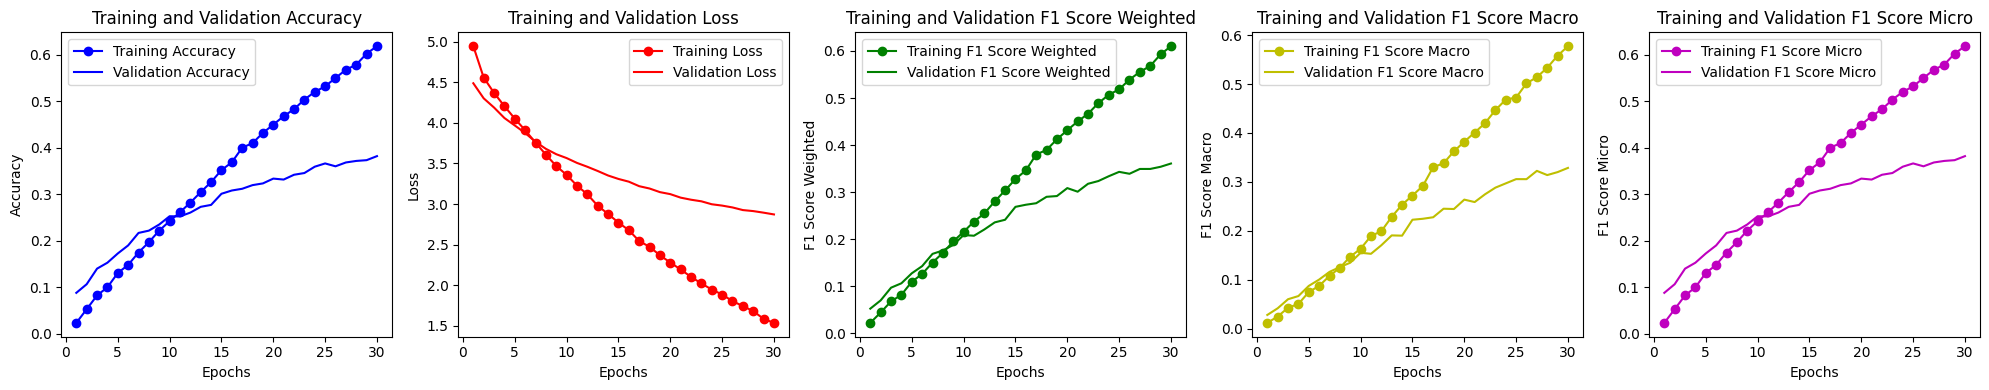

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
f1_score_weighted = history.history['f1_score_weighted']
val_f1_score_weighted = history.history['val_f1_score_weighted']
f1_score_macro = history.history['f1_score_macro']
val_f1_score_macro = history.history['val_f1_score_macro']
f1_score_micro = history.history['f1_score_micro']
val_f1_score_micro = history.history['val_f1_score_micro']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 5, 2)
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(epochs, f1_score_weighted, 'go-', label='Training F1 Score Weighted')
plt.plot(epochs, val_f1_score_weighted, 'g-', label='Validation F1 Score Weighted')
plt.title('Training and Validation F1 Score Weighted')
plt.xlabel('Epochs')
plt.ylabel('F1 Score Weighted')
plt.legend()

plt.subplot(1, 5, 4)
plt.plot(epochs, f1_score_macro, 'yo-', label='Training F1 Score Macro')
plt.plot(epochs, val_f1_score_macro, 'y-', label='Validation F1 Score Macro')
plt.title('Training and Validation F1 Score Macro')
plt.xlabel('Epochs')
plt.ylabel('F1 Score Macro')
plt.legend()

plt.subplot(1, 5, 5)
plt.plot(epochs, f1_score_micro, 'mo-', label='Training F1 Score Micro')
plt.plot(epochs, val_f1_score_micro, 'm-', label='Validation F1 Score Micro')
plt.title('Training and Validation F1 Score Micro')
plt.xlabel('Epochs')
plt.ylabel('F1 Score Micro')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

                                                       precision    recall  f1-score   support

                                 acanthosis nigricans       0.80      0.40      0.53        10
                                                 acne       0.19      0.26      0.22        19
                                        acne vulgaris       0.32      0.76      0.45        34
acquired autoimmune bullous diseaseherpes gestationis       0.00      0.00      0.00         7
                         acrodermatitis enteropathica       0.57      0.40      0.47        10
                                    actinic keratosis       0.18      0.11      0.14        18
                          allergic contact dermatitis       0.19      0.30      0.23        44
                                        aplasia cutis       0.80      0.50      0.62         8
                                 basal cell carcinoma       0.33      0.66      0.44        47
                     basal cell carcinoma morphei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# VGG19

In [ ]:
import pandas as pd

import sklearn as sk
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


import seaborn as sns
import matplotlib as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from keras.applications import VGG16, VGG19
from keras.models import Model
from keras.applications.vgg19 import preprocess_input

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def our_vgg19_model(num_classes):
    model = Sequential()
    model.add(base_model)

    x = Flatten()(base_model.output)
    x = Dropout(rate=0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(rate=0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    our_vgg19 = Model(inputs=base_model.input, outputs=output)

    return our_vgg19





train_datagen = ImageDataGenerator(
rescale=1./255,
preprocessing_function=keras.applications.vgg19.preprocess_input)

val_datagen = ImageDataGenerator (rescale=1./255, preprocessing_function=keras.applications.vgg19.preprocess_input)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=64,
                                                    class_mode= 'categorical'
                                                    )

validation_generator = val_datagen.flow_from_directory (val_dir,
                                                        target_size=(224, 224),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         shuffle=False)

IMG_SIZE = (224,224)
BATCH_SIZE = 64

test_datagen = ImageDataGenerator(
    preprocessing_function=tensorflow.keras.applications.efficientnet.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

our_vgg19 = our_vgg19_model(114)

our_vgg19.compile(loss='categorical_crossentropy',
              optimizer = optimizers.Adam(1e-5),
              metrics=['accuracy', F1Score(average='weighted', name = "f1_score_weighted"),
                       F1Score(average='micro', name = "f1_score_micro"), F1Score(average='macro', name = "f1_score_macro")])

es = EarlyStopping(monitor='val_loss', mode='min', patience=2,  restore_best_weights=True)

history = our_vgg19.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator,
    batch_size = 64,
    callbacks=[es],
    shuffle = True,
    verbose=1)



Found 12337 images belonging to 114 classes.
Found 2421 images belonging to 114 classes.
Found 1751 images belonging to 114 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 136s 635ms/step - accuracy: 0.0108 - f1_score_macro: 0.0059 - f1_score_micro: 0.0108 - f1_score_weighted: 0.0068 - loss: 5.0560 - val_accuracy: 0.0202 - val_f1_score_macro: 4.4561e-04 - val_f1_score_micro: 0.0202 - val_f1_score_weighted: 9.9589e-04 - val_loss: 4.7332
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 118s 598ms/step - accuracy: 0.0128 - f1_score_macro: 0.0075 - f1_score_micro: 0.0128 - f1_score_weighted: 0.0102 - loss: 4.7347 - val_accuracy: 0.0223 - val_f1_score_macro: 3.8842e-04 - val_f1_score_micro: 0.0223 - val_f1_score_weighted: 9.8767e-04 - val_loss: 4.7325
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 118s 598ms/step - accuracy: 0.0134 - f1_score_macro: 0.0064 - f1_score_micro: 0.0134 - f1_score_weighted: 0.0091 - loss: 4.7321 - val_accuracy: 0.0223 - val_f1_score_macro: 3.8278e-04 - val_f1_score_micro: 0.0223 - val_f1_score_weighted: 9.7330e-04 - val_loss: 4.7219
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 118s 598ms/step - accuracy: 0.0161 - f1_score_m

In [ ]:
import numpy as np

predictions = our_vgg19.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Weighted F1 Score : ", f1)


Weighted F1 Score :  0.007356373613251683


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='micro')
print("Micro F1 Score : ", f1)

Micro F1 Score :  0.03769274700171331


In [ ]:
f1 = f1_score(true_classes, predicted_classes, average='macro')
print("Macro F1 Score : ", f1)

Macro F1 Score :  0.0019460782090248564


In [ ]:
final_val_loss = history.history['val_loss'][-1]
print("Final validation loss:", final_val_loss)

Final validation loss: 4.512254238128662


In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

                                                       precision    recall  f1-score   support

                                 acanthosis nigricans       0.00      0.00      0.00        10
                                                 acne       0.00      0.00      0.00        19
                                        acne vulgaris       0.00      0.00      0.00        34
acquired autoimmune bullous diseaseherpes gestationis       0.00      0.00      0.00         7
                         acrodermatitis enteropathica       0.00      0.00      0.00        10
                                    actinic keratosis       0.00      0.00      0.00        18
                          allergic contact dermatitis       0.00      0.00      0.00        44
                                        aplasia cutis       0.00      0.00      0.00         8
                                 basal cell carcinoma       0.00      0.00      0.00        47
                     basal cell carcinoma morphei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
